```{contents}
```
## Start Symbol

In LangGraph, the **Start Symbol** is the **formal entry point of execution** for a graph.
It defines **where computation begins**, how the **initial state is injected**, and how control flow is anchored for the entire workflow.

---

### **1. Conceptual Meaning**

A LangGraph graph is a **state machine**.
The **Start Symbol** is the node that receives the **first state** and initiates execution.

Formally:

> **Start Symbol = deterministic root of the execution DAG**

Without it, the graph is **ill-defined** and cannot be executed.

---

### **2. Why the Start Symbol Exists**

| Problem                          | Solution                   |
| -------------------------------- | -------------------------- |
| Undefined execution order        | Explicit entry point       |
| Multiple possible starting nodes | Single authoritative start |
| State initialization             | Controlled injection       |
| Deterministic execution          | Reproducibility            |

---

### **3. How It Works Internally**

When `graph.invoke(input_state)` is called:

1. LangGraph **injects** `input_state` into the Start Symbol.
2. The Start Symbol’s node function executes.
3. Returned partial state is merged.
4. Control flows along outgoing edges.

---

### **4. Defining the Start Symbol**

```python
builder.set_entry_point("planner")
```

This designates `"planner"` as the **Start Symbol**.

Equivalent conceptual notation:

```
START → planner
```

---

### **5. Execution Example**

```python
from langgraph.graph import StateGraph, END
from typing import TypedDict

class State(TypedDict):
    task: str
    plan: str

def planner(state):
    return {"plan": f"Plan for {state['task']}"}

builder = StateGraph(State)
builder.add_node("planner", planner)

builder.set_entry_point("planner")
builder.add_edge("planner", END)

graph = builder.compile()
graph.invoke({"task": "build AI system"})
```

**Execution Flow**

```
Input State → [START] → planner → END
```

---

### **6. Relationship with State Initialization**

The Start Symbol controls **how the initial state enters the system**:

```python
graph.invoke({"task": "analyze data"})
```

Becomes:

```
Initial State → Start Symbol Node → Graph
```

This is why **input validation, normalization, and preprocessing** are typically placed at the Start Symbol.

---

### **7. Common Start Symbol Patterns**

| Pattern            | Start Node Role          |
| ------------------ | ------------------------ |
| Preprocessor Start | Clean and validate input |
| Planner Start      | Generate execution plan  |
| Router Start       | Choose execution path    |
| Agent Start        | Autonomous agent kickoff |
| Human Start        | Await user input         |

---

### **8. Variants & Advanced Usage**

| Variant         | Description                          |
| --------------- | ------------------------------------ |
| Static Start    | Fixed start node                     |
| Dynamic Start   | Router immediately chooses next node |
| Subgraph Start  | Nested graph with its own start      |
| Resumable Start | Re-entry from checkpoint             |
| Event Start     | Triggered by external event          |

---

### **9. Production Considerations**

| Concern       | Strategy             |
| ------------- | -------------------- |
| Invalid input | Validate at Start    |
| Security      | Sanitize at Start    |
| Observability | Log initial state    |
| Idempotency   | Safe retries         |
| Versioning    | Start node migration |

---

### **10. Mental Model**

Think of the Start Symbol as the **"main()" function** of your AI system.

Everything that happens downstream is **causally rooted** in the Start Symbol.

In [1]:
from typing import TypedDict

class State(TypedDict):
    task: str
    plan: str
    result: str

def planner(state: State):
    print("Planner executing...")
    return {"plan": f"Plan for: {state['task']}"}

def executor(state: State):
    print("Executor executing...")
    return {"result": f"Executed → {state['plan']}"}

from langgraph.graph import StateGraph, END

builder = StateGraph(State)

builder.add_node("planner", planner)
builder.add_node("executor", executor)

# This defines the Start Symbol
builder.set_entry_point("planner")

builder.add_edge("planner", "executor")
builder.add_edge("executor", END)

graph = builder.compile()


In [2]:
output = graph.invoke({"task": "Design an AI system"})
print(output)


Planner executing...
Executor executing...
{'task': 'Design an AI system', 'plan': 'Plan for: Design an AI system', 'result': 'Executed → Plan for: Design an AI system'}


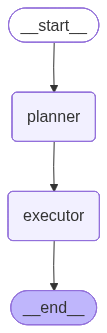

In [3]:
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())